Name: Smita Gupta<br>
USC ID: 4123927261

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
import warnings
import os
import xgboost as xgb
import matplotlib.pyplot
import weka.core.jvm as jvm
jvm.start()
import weka.core.converters as convert
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from math import sqrt, floor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
%matplotlib inline

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


1. The LASSO and Boosting for Regression<br>
(a) Download the Communities and Crime data1 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

1) b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [1]:
#Setting the paths 
crime = "Homework 4 Data/communities_data.csv"

In [4]:
#Column names for the crime data
crime_columns = ["state","county","community","communityname string","fold","population","householdsize",
                  "racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29",
                  "agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf",
                  "pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap",
                  "blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov",
                  "PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy",
                  "PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce",
                  "MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par",
                  "PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg",
                  "NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig",
                  "PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell",
                  "PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous",
                  "PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR",
                  "HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos",
                  "MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal",
                  "OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc",
                  "MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn",
                  "PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT",
                  "LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq",
                  "LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite",
                  "PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits",
                  "NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars",
                  "PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn",
                  "PolicBudgPerPop","ViolentCrimesPerPop"]

In [5]:
pd.read_csv(crime)

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1989,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [6]:
def col_index(dataFrame, ycol_index):
    xcol_index = list(range(0, dataFrame.shape[1]))
    if ycol_index == -1:
        xcol_index.remove(dataFrame.shape[1] - 1)
    else:
        xcol_index.remove(ycol_index)

    return xcol_index

In [7]:
#Method for data imputation
def data_impute(dataFrame, assignedColNames, ycol_name):
    # get the indexes if the column's content has nan
    imputeIndex = list()
    missingValCol = dataFrame.columns[dataFrame.isnull().any()]
    remainColNames = list(set(assignedColNames) - set(missingValCol.tolist()))
    remainColNames.remove(ycol_name)
    remainColNames.sort(key=assignedColNames.index)
    for index in missingValCol:
        # if there are more than 2/3 of data exist in that column, we can use mean strategy to impute data.
        # print(X_data[index].item())
        if dataFrame[index].count() > (2 * len(dataFrame) / 3):
            imputeIndex.append(index)
            remainColNames.append(index)

    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    for index in imputeIndex:
        originalValue = dataFrame[index].to_numpy().reshape(-1, 1)
        imp_mean.fit(originalValue)
        dataFrame[index] = imp_mean.transform(originalValue)

    return dataFrame, remainColNames

In [9]:
#Method for data loading
def load_data(filePath, skip_first_column=0, skip_first_row=0, ycol_index=-1, needImpute=False,
              assignedColNames=crime_columns, missingSymbol='?', dropOrNot=True, 
              get_first_rows=None):
    
    assert (filePath is not None) and (len(filePath) >= 1), "empty file path"
    
    dataFrame = pd.read_csv(filePath, encoding='utf-8', delimiter=",", 
                            header=None, skiprows=skip_first_row)
    
    dataFrame.columns = assignedColNames
    ycol_name = assignedColNames[ycol_index]

    # skip some columns
    dataFrame.drop(dataFrame.iloc[:, :skip_first_column], inplace=True, axis=1)
    assignedColNames = assignedColNames[skip_first_column:]

    xcol_index = col_index(dataFrame, ycol_index)

    # If need process data imputation
    if needImpute:

        X_data = dataFrame.iloc[:, xcol_index].replace(missingSymbol, np.nan)
        # get the indexes if the column's content has nan
        X_data, remainColNames = data_impute(X_data, assignedColNames, ycol_name)

        # drop some column which contain missing value.
        if dropOrNot:
            X_data = X_data.dropna(axis=1)
            X_data.columns = remainColNames
        y_data = dataFrame.iloc[:, ycol_index]
    else:
        X_data = dataFrame.iloc[:, xcol_index]
        y_data = dataFrame.iloc[:, ycol_index]

    return X_data, y_data


In [10]:
#Method for test dataset and train dataset split
def train_test_split(X_data, y_data, train_size, random_state=None):
    assert X_data.shape[0] == y_data.shape[0], \
        "the size of X must be equal to the size of y"
    if random_state:
        np.random.seed(random_state)

    shuffled_indexes = np.random.permutation(len(X_data))

    test_size = len(X_data) - train_size
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X_data.loc[train_indexes, :]
    y_train = y_data.loc[train_indexes]

    X_test = X_data.loc[test_indexes, :]
    y_test = y_data.loc[test_indexes]

    return X_train, X_test, y_train, y_test

In [11]:
#Crime Data
X_data, y_data = load_data(crime, ycol_index=-1)

print("X Row Data Shape: ", X_data.shape)
print("y Row Data Shape: ", y_data.shape)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                            train_size=1495, random_state=2333)

print("X_Train Data Shape: ", X_train.shape)
print("y_Train Data Shape: ", y_train.shape)
print("X_test Data Shape: ", X_test.shape)
print("y_test Data Shape: ", y_test.shape)

X Row Data Shape:  (1994, 127)
y Row Data Shape:  (1994,)
X_Train Data Shape:  (1495, 127)
y_Train Data Shape:  (1495,)
X_test Data Shape:  (499, 127)
y_test Data Shape:  (499,)


1) b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [12]:
#Performing Data imputation on the crime dataset
X_data, y_data = load_data(crime, ycol_index=-1, skip_first_column=5)
print("X_data Row Data Shape: ", X_data.shape)
print("y Row Data Shape: ", y_data.shape)
X_data = X_data.replace('?', np.nan)
missingValColIndex = X_data.columns[X_data.isnull().any()]

print("In the beginning, there are total {} columns has missing value in the dataset ".format(
    missingValColIndex.shape[0]))
print("------------------------------------------------------------------------------")
print(X_data[missingValColIndex].describe())

#We can only impute only one column (index=25)
index = 'OtherPerCap'
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_data[[index]])
X_data[[index]] = imp_mean.transform(X_data[[index]])
print("------------------------------------------------------------------------------")
missingValColIndex = X_data.columns[X_data.isnull().any()]
print("After Data Imputation (mean strategy), we only have {} columns has missing value.".format(
    missingValColIndex.shape[0]))

#Drop some column which contain missing value.
X_data = X_data.dropna(axis=1)
print("Finally, I gonna use X_data in the shape of {} to training algorithm.".format(X_data.shape))

X_data Row Data Shape:  (1994, 122)
y Row Data Shape:  (1994,)
In the beginning, there are total 23 columns has missing value in the dataset 
------------------------------------------------------------------------------
       OtherPerCap LemasSwornFT LemasSwFTPerPop LemasSwFTFieldOps  \
count         1993          319             319               319   
unique          97           38              52                34   
top              0         0.02             0.1              0.98   
freq           129           80              19                81   

       LemasSwFTFieldPerPop LemasTotalReq LemasTotReqPerPop PolicReqPerOffic  \
count                   319           319               319              319   
unique                   55            44                59               75   
top                    0.14          0.02              0.14             0.23   
freq                     17            55                23               15   

       PolicPerPop RacialMatchCo

1) c) Plot a correlation matrix for the features in the data set.

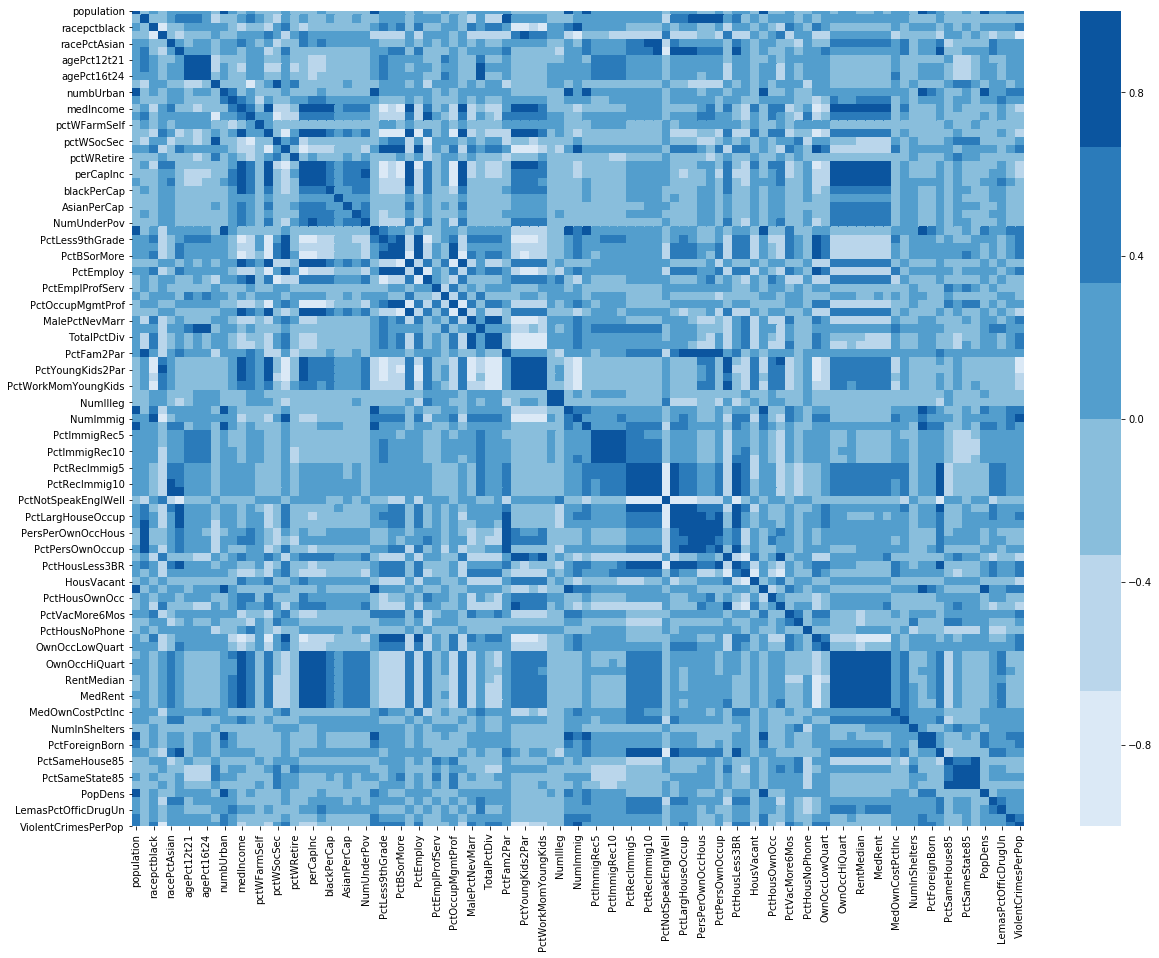

In [13]:
#Plotting correlation matrix
warnings.filterwarnings('ignore')
X_data, y_data = load_data(crime, skip_first_column=5, 
                           ycol_index=-1, needImpute=True)

data = pd.concat([X_data, y_data], axis=1)
correlation = data.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap=sns.color_palette("Blues"))
plt.show()

1) d) Calculate the Coefficient of Variation CV for each feature, where CV = ms , in
which s is sample standard deviation and m is sample mean..

In [14]:
#Calculating Coefficient of Variation CV for each feature
X_data, y_data = load_data(crime, skip_first_column=5, 
                           ycol_index=-1, needImpute=True)

data = pd.concat([X_data, y_data], axis=1)
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())
print("The total {} features CV are: \n {}".format(len(cvResult), cvResult))

The total 101 features CV are: 
 [2.20294993 0.3532097  1.41056656 0.32370036 1.35882134 1.61387296
 0.36574812 0.29061999 0.49503634 0.42333552 2.00124163 0.63868866
 0.579608   0.32762787 0.69985456 0.35914986 0.36842021 0.6988552
 0.3495514  0.52759954 0.54549659 0.5074249  0.58932117 0.80948203
 0.60604183 0.67047639 0.47384086 2.30439167 0.75379109 0.67543079
 0.52815378 0.57825579 0.55599333 0.34724014 0.5104523  0.39812581
 0.5083338  0.422      0.39548416 0.40371035 0.3591826  0.371375
 0.31687526 0.33052823 0.3323925  0.32934323 0.32846855 0.33616412
 0.33263868 2.99344555 0.91957222 2.89976977 0.6840295  0.58474358
 0.50478324 0.45555177 1.29977426 1.29730638 1.28091166 1.28371176
 0.28860078 1.45870069 0.73435052 0.75691886 0.36682182 0.31932719
 0.46833631 0.3502283  1.1269169  0.34828327 0.81068443 1.9582885
 0.26957935 0.33745632 1.0644754  0.43600961 0.47029345 0.91798069
 0.84853101 0.84766758 0.87852946 0.8745136  0.63302762 0.56174345
 0.58686703 0.55545314 0.34574279

1) e) Pick floor(sqrt(128)) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [15]:
#Remaining columns of crime dataset
crime_remaining_col = ['population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp',
                        'agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome',
                        'pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc',
                        'perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
                        'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore',
                        'PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf',
                        'MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par',
                        'PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg',
                        'PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10',
                        'PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly',
                        'PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous',
                        'PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant',
                        'PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone',
                        'PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ',
                        'MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet',
                        'PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LandArea',
                        'PopDens','PctUsePubTrans','LemasPctOfficDrugUn','ViolentCrimesPerPop']

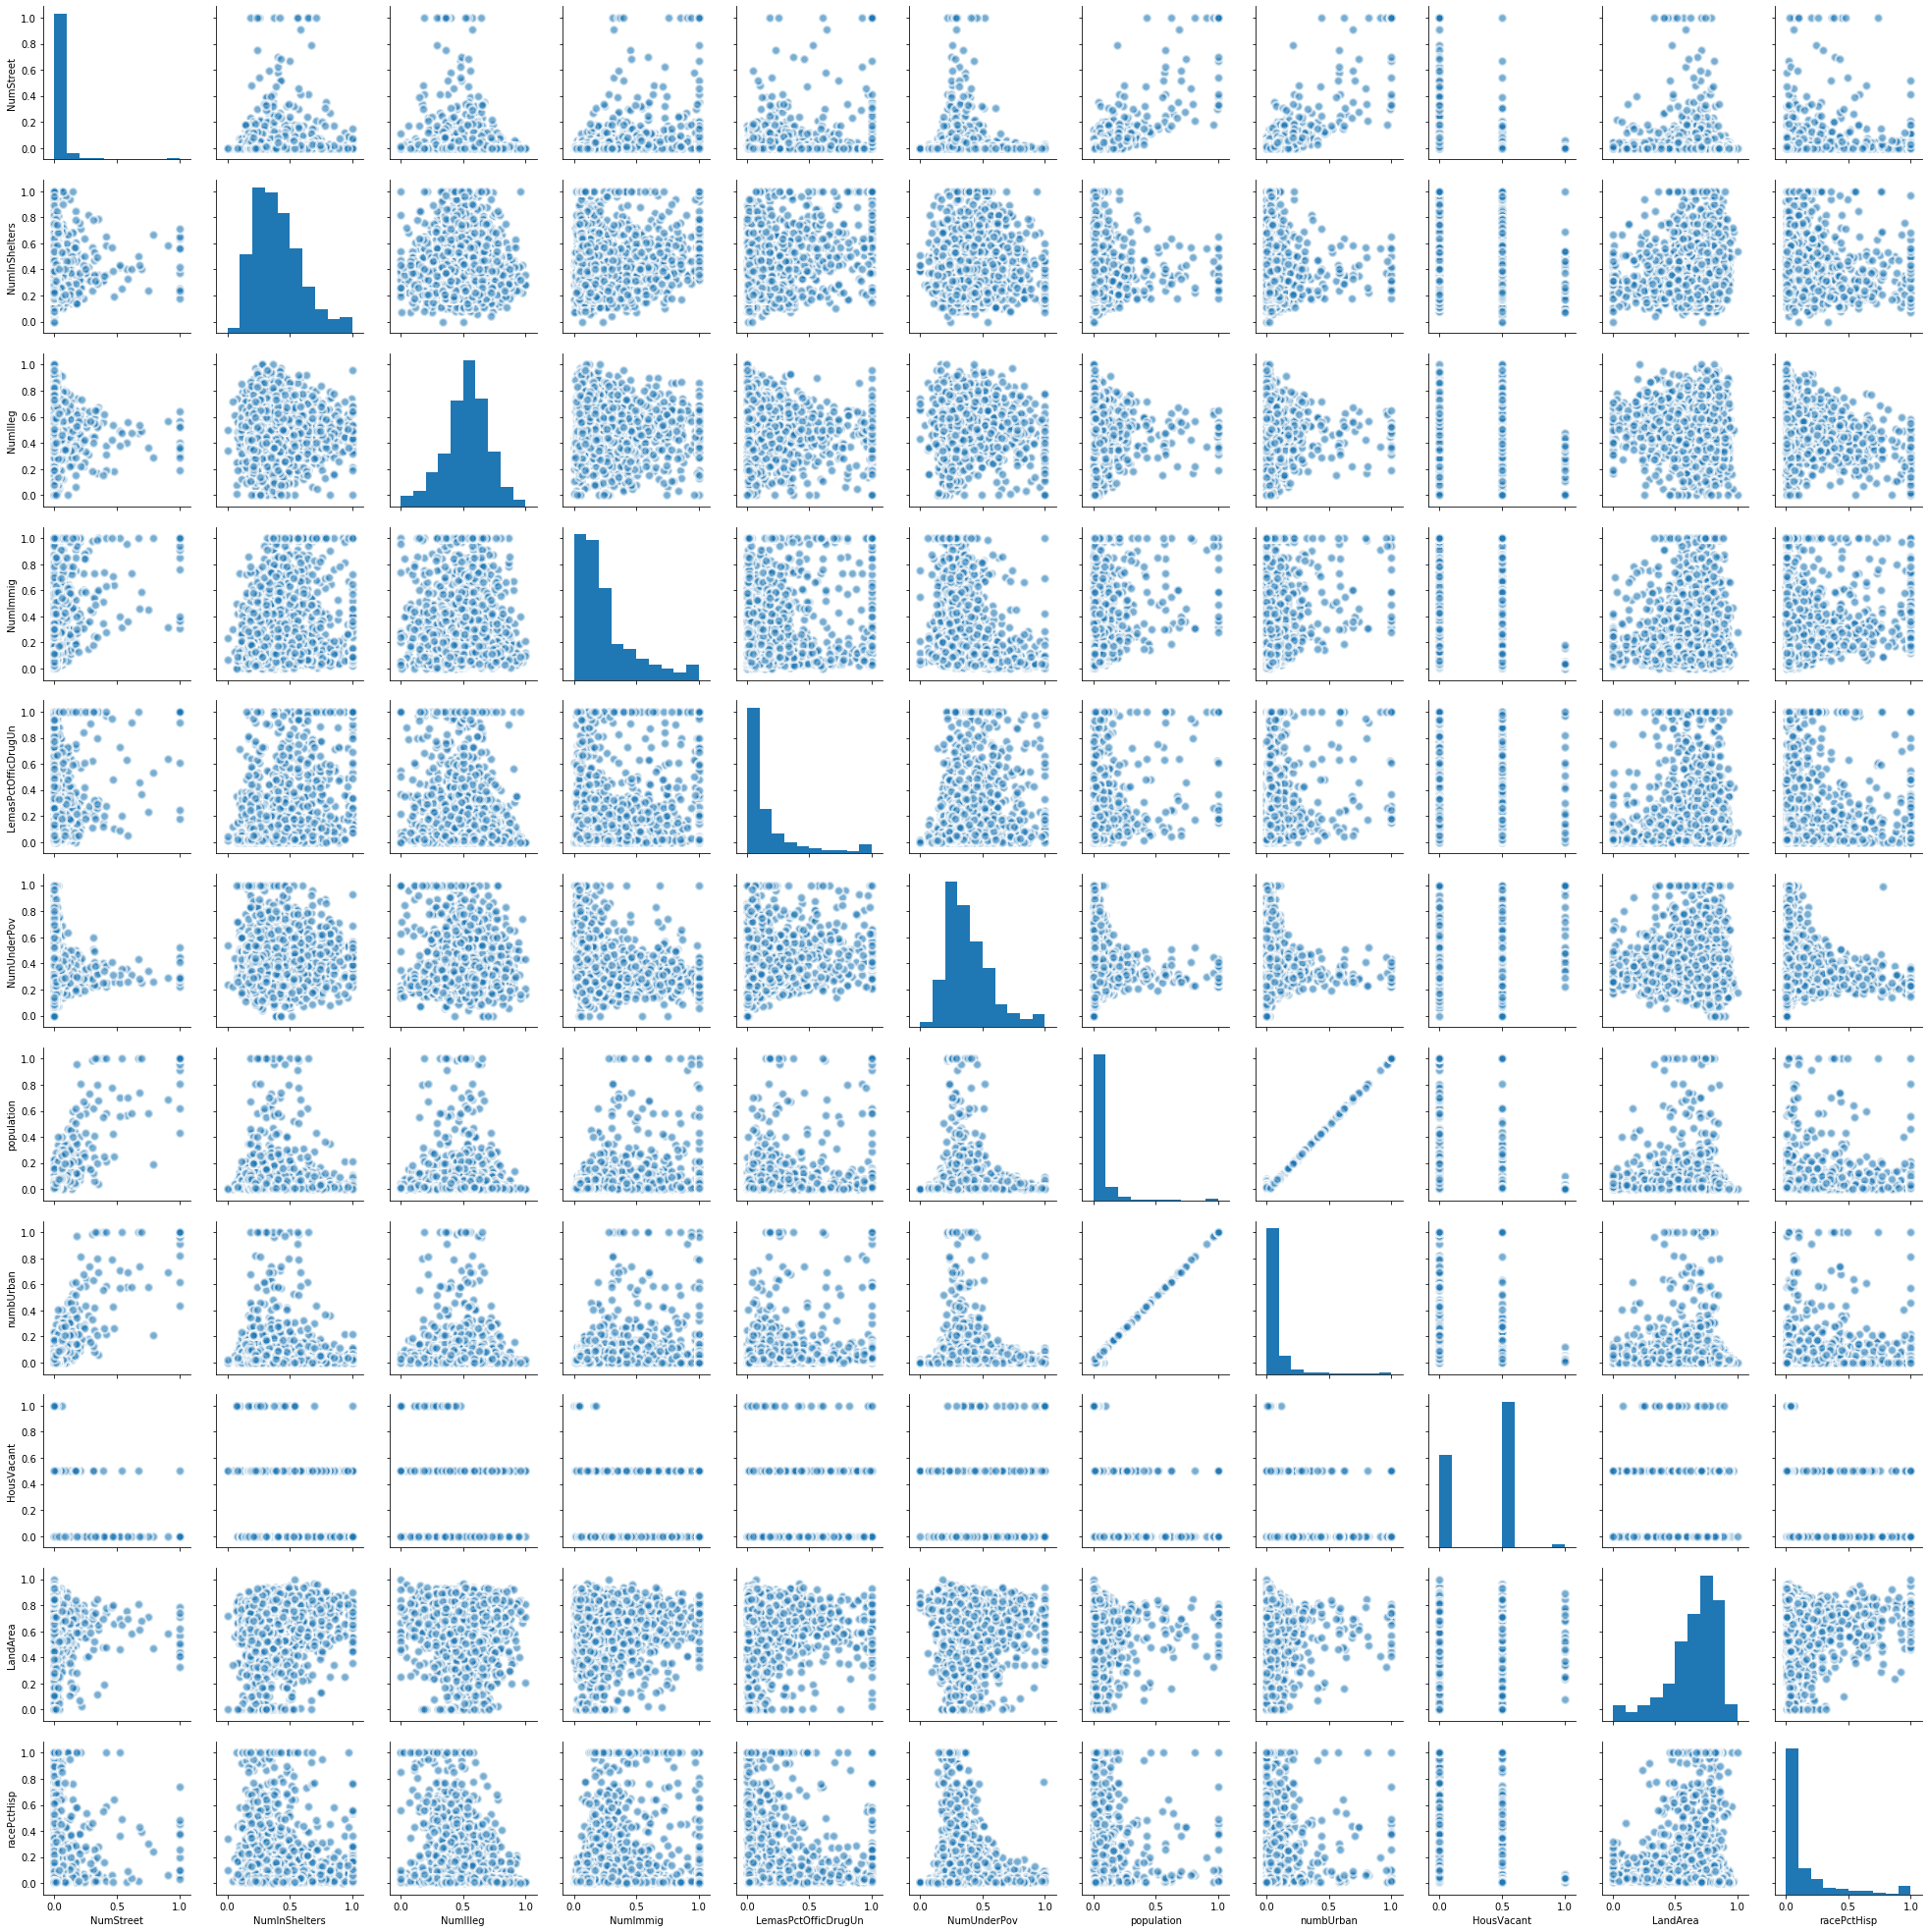

In [16]:
#Plotting Scatterplots
data = pd.concat([X_data, y_data], axis=1)
cvFormula = lambda x: np.std(x) / np.mean(x)
cvResult = np.apply_along_axis(cvFormula, axis=0, arr=data.to_numpy())

first_sqrt_128 = floor(sqrt(128))
cvResultIndexes = np.argsort(-cvResult)[:first_sqrt_128]
highestCVFeatureNames = np.array(crime_remaining_col)[cvResultIndexes]
renderData = X_data[highestCVFeatureNames]

sns.pairplot(renderData, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.6))
plt.show()

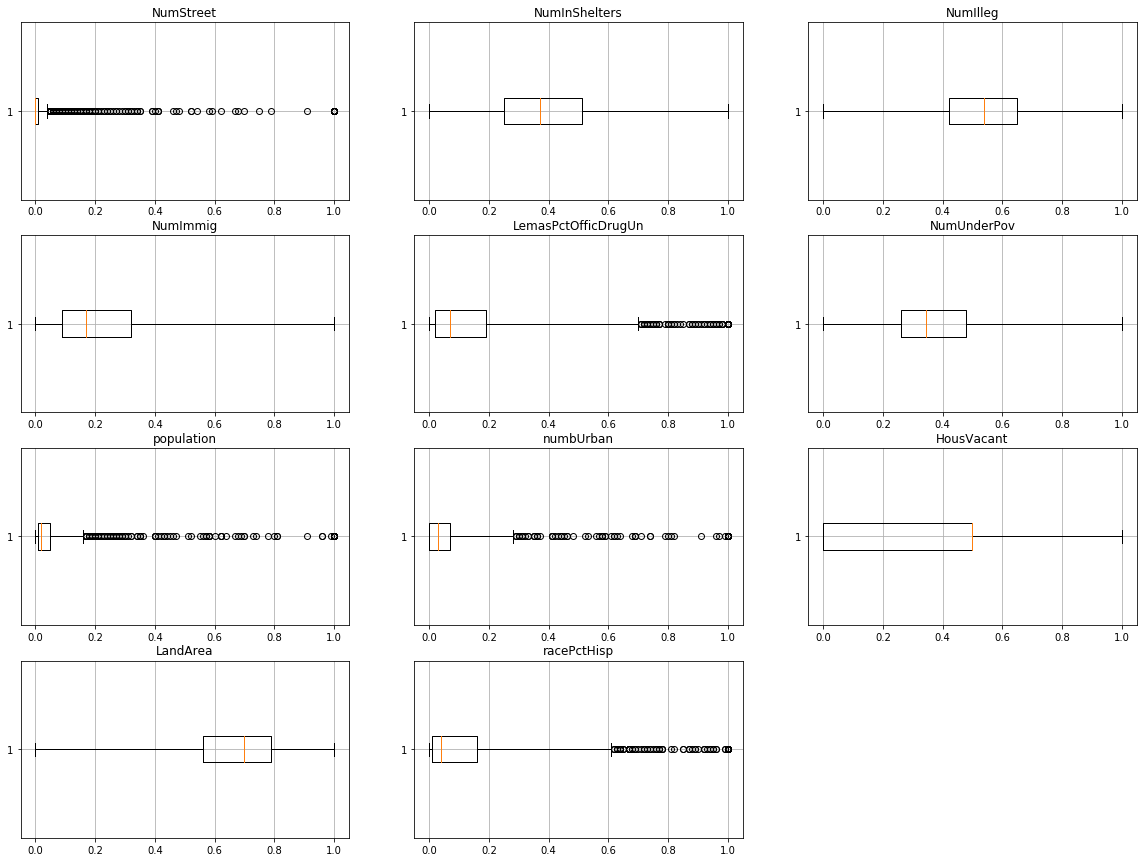

In [17]:
#Plotting Boxplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

index = 0
for a in range(0, 4):
    for b in range(0, 3):
        if index < 11:
            ax[a, b].boxplot(renderData.loc[:, highestCVFeatureNames[index]], whis=3, vert=False)
            ax[a, b].grid(True)
            ax[a, b].title.set_text(highestCVFeatureNames[index])
            b, index = b + 1, index + 1

ax[3, 2].remove()
plt.show()

1) f) Fit a linear model using least squares to the training set and report the test error.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=1495, 
                                                            random_state=2333)

model = LinearRegression().fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("Score : ", model.score(X_test, y_test))

Mean Square Error :  0.019183263776179127
Score :  0.6458883541729514


1) g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [19]:
#Method for Ridge regression model 
def RidgeRegCV():
    return Pipeline([
        ('std_sclaer', StandardScaler()),
        ('ridge_reg', RidgeCV(cv=10))
    ])  

ridgeCV = RidgeRegCV().fit(X_train, y_train)
y_predict = ridgeCV.predict(X_test)
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("Score : ", ridgeCV.score(X_test, y_test))

Mean Square Error :  0.018943716131193066
Score :  0.6503102613004206


1) h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

In [20]:
#Method for LASSO model
def LassoRegCV():
    return Pipeline([
        ('std_sclaer', StandardScaler()),
        ('lasso_cv', LassoCV(cv=10, random_state=233))
    ])

lassoNormReg = LassoCV(cv=10, random_state=233).fit(X_train, y_train)
y_predict = lassoNormReg.predict(X_test)
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("Score : ", lassoNormReg.score(X_test, y_test))

lassoStdReg = LassoRegCV().fit(X_train, y_train)
y_predict = lassoStdReg.predict(X_test)
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))
print("Score : ", lassoStdReg.score(X_test, y_test))

Mean Square Error :  0.018881207494723426
Score :  0.6514641335714235
Mean Square Error :  0.01883332342359085
Score :  0.6523480450598698


1) i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [21]:
#PCR model
linReg = LinearRegression()
mse = list()
score = -1 * cross_val_score(linReg, np.ones((len(X_train), 1)), y_train, cv=10,
                             scoring='neg_mean_squared_error').mean()
mse.append(score)
for m in range(1, X_data.shape[1]):
    pca = PCA(n_components=m)
    X_train_reduced = pca.fit_transform(scale(X_train))
    mse.append(-1 * cross_val_score(linReg, X_train_reduced, y_train, cv=10,
                                    scoring='neg_mean_squared_error').mean())

bestM = np.argsort(mse)[0]
print("Best M : ", bestM)

pca = PCA(n_components=bestM)
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.fit_transform(scale(X_test))
bestReg = LinearRegression().fit(X_train_reduced, y_train)
y_predict = bestReg.predict(X_test_reduced)
print("Mean Square Error : ", mean_squared_error(y_test, y_predict))

Best M :  81
Mean Square Error :  0.11724534432828665


1) j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost3 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [22]:
#Using XGBoost3 to fit the model tree
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

xgb_clf = xgb.XGBRegressor(n_estimators=100, max_depth=4, 
                           objective="reg:squarederror", silent=False)

parameters = {'reg_alpha': [1e-5, 1e-4, 1e-3, 0.01, 0.1]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters alpha :", grid_search.best_params_)

[19:43:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters alpha : {'reg_alpha': 0.001}
